# Geospatial Data Analysis I 

## Multivariate statistics - Solution

This exercise is about analysing and visualising multi-dimensional data. For this will again use the dataset on groundwater paremeters in Karlsruhe (the large one: "Data_GW_KA.csv"). 

- Import the csv or excel file as a Dataframe via Pandas.  

- Check the dataframe for any columns that contain strings or NaNs and drop them, as we will not be able to work with them here. 

In [1]:
# [1]
import pandas as pd  
data = pd.read_csv('Data_GW_KA.csv', sep=';', encoding='cp1252') # 

data = data.drop(columns='Name') # strings cannot be standardised
data = data.drop(columns='Iron_mg/l') # strings cannot be standardised

data.head() 

,Depth_m,Oxygen_mg/l,GW_Temperature_°C,electric_conductivity_mS/cm,pH,Phosphate_mg/l,Nitrate_mg/l,Detritus,Sediment,Geology,Land_use,Abundancy_Species,Abundancy_Individuals,Perc_Crustaceen_%,Perc_Oligochaeten_%
0,39.0,0.97,14.4,608.00,6.98,0.10,1.50,3,3.0,1,1,0,0,0,0
1,10.0,1.45,14.0,557.67,7.00,0.07,7.00,2,2.0,2,1,2,4,100,0
2,15.8,1.07,12.5,592.00,7.06,0.10,1.50,3,3.0,3,1,0,0,0,0
3,9.3,1.29,14.4,689.00,7.02,0.20,1.50,3,3.0,4,1,1,1,0,100
4,11.0,4.02,14.2,846.00,7.06,0.40,7.33,3,3.0,1,1,3,7,86,14


### Exercise 1: Principal component analysis in 5 steps

#### 1. Standardising the data

From last week we already know that the variances and covariances of the dataset vary over several orders of magnitude. Accordingly, we need to standardise (or transform) all parameters before further analysis, so that they follow a standard normal distribution *N* (0, 1). 

One option in Python to do this is the function `sklearn.preprocessing.StandardScaler().fit_transform()` from the package `sklearn`. 

- Import the function `sklearn.preprocessing.StandardScaler().fit_transform()`. 

- Create a variable for the standardised data using the method above. The first brackets takes no arguments (i.e. it remains empty), the second one takes the name of the dataset to be transformed. 

- Check the statistical characteristics of the created standardised dataset.  

In [2]:
# [2] 

from sklearn.preprocessing import StandardScaler 
from scipy.stats import describe

data_std = StandardScaler().fit_transform(data)

describe(data_std)

DescribeResult(nobs=39, minmax=(array([-0.90089419, -1.4886461 , -1.46949961, -2.30618548, -4.28627906,
       -0.44315535, -1.2079113 , -1.05522364, -1.06439404, -1.288304  ,
       -0.50800051, -1.97180121, -0.63913771, -1.26059179, -1.04098467]), array([4.82659722, 2.67648053, 1.92461181, 3.49528357, 1.18135541,
       5.90054486, 1.91657501, 1.43894133, 1.45220903, 0.92833671,
       1.96850197, 2.30043474, 3.64444484, 1.20619595, 1.48222242])), mean=array([ 5.35184432e-16,  3.24526730e-16, -1.06467541e-15, -3.61534164e-16,
        7.51535586e-16,  1.31038343e-16, -4.78249918e-16, -5.69345141e-17,
        9.10952225e-17, -2.27738056e-17,  1.93577348e-16,  7.25915055e-17,
       -4.27008856e-18,  1.85037171e-17,  9.96353996e-18]), variance=array([1.02631579, 1.02631579, 1.02631579, 1.02631579, 1.02631579,
       1.02631579, 1.02631579, 1.02631579, 1.02631579, 1.02631579,
       1.02631579, 1.02631579, 1.02631579, 1.02631579, 1.02631579]), skewness=array([ 3.19237577,  0.55890712,  0

#### 2. Calculating eigenvalues and eigenvectors

Now we can calculate the eigenvalues and eigenvectors of the covariance matrix, i.e. the axes in the parameter space that later represent the prinicpal components.

- First, calcualte the covariance matrix of your data using `numpy.cov(data.T)`. The `.T` is used to calculate the transposed data matrix (columns become rows), which simplifies matrix handling in the following steps. 

- Then, use `numpy.linalg.eig()` to calculate the eigenvalues and eigenvectors (i.e. two outputs for one function) with the covariance matrix as the input. 

In [3]:
# [3] 
import numpy as np

# Covariance matrix
cov_std = np.cov(data_std.T)
print(cov_std)

# eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_std)
print(eig_vals)
print(eig_vecs)

[[ 1.02631579e+00  1.84719598e-01 -8.69440726e-02  4.46882576e-02
   1.36302760e-01 -1.81242936e-01 -3.55866558e-01  2.42718455e-01
   3.08165968e-01 -1.14381300e-01  3.15998223e-01 -2.08389560e-01
  -8.87729018e-03 -9.26690686e-02 -2.53206116e-01]
 [ 1.84719598e-01  1.02631579e+00 -1.46588767e-01  3.07524955e-01
   3.56611865e-01 -1.95991191e-01 -7.65247773e-02 -2.74827912e-02
   6.29534190e-02 -3.51136760e-02  5.08510652e-01  4.88231121e-01
   2.34985224e-01  1.37214750e-01  1.31849150e-01]
 [-8.69440726e-02 -1.46588767e-01  1.02631579e+00  2.71991339e-01
  -1.29201119e-01 -6.14004168e-02  2.12383128e-01 -1.81439072e-02
  -8.26261987e-03  2.62269580e-01 -7.10695292e-01  5.04463564e-03
   5.51790182e-02 -2.24651631e-01  1.92273920e-01]
 [ 4.46882576e-02  3.07524955e-01  2.71991339e-01  1.02631579e+00
   6.71009444e-02 -2.78239160e-02  2.36120321e-01  7.97279898e-02
   9.64961674e-02  1.12890684e-02 -2.42265281e-03  2.39654626e-01
   4.28721207e-02  2.98212466e-01 -2.96898003e-01]
 [ 1

#### 3. Determining principal components

The aim of principal component analysis is to reduce the dimensions of the dataset, e.g. for visualising the entire information of the data in 2D, while preserving as much information, i.e. variance, as possible. The direction (orientation of the axes in the parameter space) of the principal components is equal to the eigenvectors (with a unit length of 1). In order to preserve as much information as possible, we are interested in the eigenvectors with the highest eigenvalues. 

- First, define a new variable as an empty list (`name = [[]]*n`), with `n` being the number of eigenvalues. 

- Now, we want to fill this list with the eigenvalues (one value) and the corresponding eigenvectors (*n* values) per row: row_list = [(eigenvalue, eigenvector)]. You can e.g. use a for-loop to do so. Because we are interested in overall information content, we need to use the absolute values `numpy.abs(array)` for eigenvalues and eigenvectors. 

Tipp: in the for-loop, the indexing for eigenvalues is per row (with a simple index `[i]`), the eigenvectors need to be indexed column-wise (`[:,i]`), as the eigenvectors are a 15x15 matrix. 

In [4]:
# [4]
# new, empty list
eig_pairs = [[]]*(len(eig_vals))

# for-loop for filling the list
for i in range(len(eig_vals)):
    eig_pairs[i] = [(np.abs(eig_vals[i]), eig_vecs[:,i])]

eig_pairs

[[(2.983623823753347,
   array([ 0.2148891 ,  0.36525401, -0.3106417 ,  0.14084981,  0.35038887,
          -0.04576564, -0.18700741,  0.06595438,  0.10616576, -0.12772047,
           0.48594361,  0.26271961,  0.18711692,  0.32114993, -0.26265975]))],
 [(2.6993292050779893,
   array([ 0.30597167, -0.0361922 , -0.0774804 , -0.16143611, -0.04838644,
          -0.2683428 , -0.35908707,  0.40609975,  0.4225409 , -0.16050311,
           0.09428273, -0.3677747 , -0.00352115, -0.36541961,  0.15100853]))],
 [(2.112678315826858,
   array([-0.0474351 ,  0.06298973, -0.23767105, -0.3621254 ,  0.2095852 ,
           0.01563145, -0.30139367, -0.45432325, -0.42019243,  0.01395556,
           0.27348796, -0.12003095, -0.10106322, -0.23134237,  0.36749044]))],
 [(1.663837946335116,
   array([ 0.11453328, -0.45640463, -0.34615694, -0.20206703, -0.03688456,
           0.28181817, -0.0743677 ,  0.03392131, -0.04073742,  0.06942486,
           0.05722007, -0.30319328, -0.3747602 ,  0.26553329, -0.46671755]

Now we need to identify the rows with the highest eigenvalues. 

- Sort the created list using `list.sort()` and `list.reverse()`, in a way that the first entry has the highest eigenvalue. 

In [5]:
# [5] 

eig_pairs.sort()
eig_pairs.reverse()

# sortierte Wertepaare anzeigen lassen
print(eig_pairs)

[[(2.983623823753347, array([ 0.2148891 ,  0.36525401, -0.3106417 ,  0.14084981,  0.35038887,
       -0.04576564, -0.18700741,  0.06595438,  0.10616576, -0.12772047,
        0.48594361,  0.26271961,  0.18711692,  0.32114993, -0.26265975]))], [(2.6993292050779893, array([ 0.30597167, -0.0361922 , -0.0774804 , -0.16143611, -0.04838644,
       -0.2683428 , -0.35908707,  0.40609975,  0.4225409 , -0.16050311,
        0.09428273, -0.3677747 , -0.00352115, -0.36541961,  0.15100853]))], [(2.112678315826858, array([-0.0474351 ,  0.06298973, -0.23767105, -0.3621254 ,  0.2095852 ,
        0.01563145, -0.30139367, -0.45432325, -0.42019243,  0.01395556,
        0.27348796, -0.12003095, -0.10106322, -0.23134237,  0.36749044]))], [(1.663837946335116, array([ 0.11453328, -0.45640463, -0.34615694, -0.20206703, -0.03688456,
        0.28181817, -0.0743677 ,  0.03392131, -0.04073742,  0.06942486,
        0.05722007, -0.30319328, -0.3747602 ,  0.26553329, -0.46671755]))], [(1.3999319282841023, array([-0.20

The first two rows of this list now contain the two main principal components with the largest variances. 

- Save these first two rows as two separate variables of the type `list`.  

In [6]:
# [6]
# principal components 1 und 2
pc1 = eig_pairs[0]
pc2 = eig_pairs[1]

print(pc1, pc2)

[(2.983623823753347, array([ 0.2148891 ,  0.36525401, -0.3106417 ,  0.14084981,  0.35038887,
       -0.04576564, -0.18700741,  0.06595438,  0.10616576, -0.12772047,
        0.48594361,  0.26271961,  0.18711692,  0.32114993, -0.26265975]))] [(2.6993292050779893, array([ 0.30597167, -0.0361922 , -0.0774804 , -0.16143611, -0.04838644,
       -0.2683428 , -0.35908707,  0.40609975,  0.4225409 , -0.16050311,
        0.09428273, -0.3677747 , -0.00352115, -0.36541961,  0.15100853]))]


#### 4. Constructing the matrix for visualisation 

Using the principal components as rotational axes, we now want to transform (or project) the orginal data points onto the two identified axes in the parameter space (i.e. the principal components). In order to reduce 15 parameters to two dimensions we need a 15x2 matrix, with the two eigenvectors (those with the highest eigenvalue) as columns. You have already saved these two eigenvectors and their eigenvalues as seperate lists in the last step. 

- Use `numpy.stack((vector1, vector2))` to create the required transformation matrix. With the additional argument `axis=-1` you can make sure that the two lists (or vectors) are aligned horizontally. Also, make sure the correc index, so that only the eigenvector is contained in the matrix (we do not need the eigenvalues anymore). 

- Check the size of the created matrix to make sure it has 15x2 dimensions. 

In [7]:
# [7]
# creating transformation matrix
matrix_W = np.stack((pc1[0][1], pc2[0][1]), axis=-1) 

# print matrix
print(matrix_W.shape)
print (matrix_W)

(15, 2)
[[ 0.2148891   0.30597167]
 [ 0.36525401 -0.0361922 ]
 [-0.3106417  -0.0774804 ]
 [ 0.14084981 -0.16143611]
 [ 0.35038887 -0.04838644]
 [-0.04576564 -0.2683428 ]
 [-0.18700741 -0.35908707]
 [ 0.06595438  0.40609975]
 [ 0.10616576  0.4225409 ]
 [-0.12772047 -0.16050311]
 [ 0.48594361  0.09428273]
 [ 0.26271961 -0.3677747 ]
 [ 0.18711692 -0.00352115]
 [ 0.32114993 -0.36541961]
 [-0.26265975  0.15100853]]


#### 5. Projection onto the new axes and visualisation

Now, you can perform the tranforamtion of your standardised matrix from above using the equation `Y = data x W `. 

- Use the syntax for matrix multplication `matrix1.dot(matrix2)` your transform your data. The output matrix should have the dimension 39 x 2 (datapoints x PCs).  

In [8]:
# [8]
# Matrix multiplication 
Y = data_std.dot(matrix_W)

# Größe der Matrix anzeigen lassen
print(np.shape(Y))

(39, 2)


To make further analysis of the PCA results easier, we can convert the matrix into a `pandas` DataFrame. Also, we can then add additional information to this DataFrame for enhanced visualisation. 

- Convert the matrix (or ndarray) into a DataFrame (x = pd.DataFrame(data = data, columns = ['column', 'more columns']))

- Add a column with the values for the land use type (the original ones, not the standardised ones) to this DataFrame. 

- Then, visualise the PCA results as a Score Plot, i.e. a scatter plot with the first PC on the x-axis, and the second PC on the y-axis. Use the land use type as color for the scatter points. What do the results indicate for the land use?  

(39, 2)
    principal component 1  principal component 2  Land_use
0               -0.392310               4.492717         1
1               -0.837859              -0.133916         1
2               -1.123591               2.994448         1
3               -2.184060               2.370946         1
4                0.112368               0.344115         1
5               -1.942483               0.463036         1
6               -1.468191               1.542993         1
7               -1.976517              -0.502661         1
8               -1.764048               0.364215         1
9               -0.435029              -3.717836         1
10              -1.686851               0.915478         1
11              -1.966881               1.436134         1
12              -1.108189              -1.257953         1
13              -1.184446               2.020239         1
14               0.059804              -2.201549         1
15              -1.079665              -0.896639

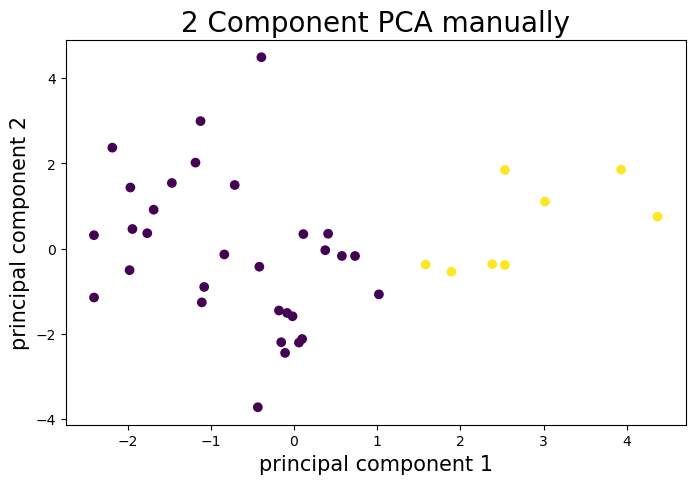

In [19]:
# [9]
# aus ndarray einen DataFrame erzeugen 
principalDf = pd.DataFrame(data = Y , columns = ['principal component 1', 'principal component 2'])

print(principalDf.shape)

#print(principalDf)

# eine dritte Spalte mit den Werten der Flächennutzung ergänzen
Z = pd.DataFrame(data,columns = ['Land_use'])
finalDf = pd.concat([principalDf, Z], axis = 1) 

print(finalDf)

# hier Abbildung mit matplotlib erzeugen

import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(8, 5))
ax = fig.add_subplot(1,1,1) 
ax.scatter(finalDf['principal component 1'], 
           finalDf['principal component 2'], 
           c = finalDf['Land_use']*30)
ax.set_xlabel('principal component 1', fontsize = 15) 
ax.set_ylabel('principal component 2', fontsize = 15)
ax.set_title('2 Component PCA manually', fontsize = 20) 
plt.show()



### Principal Component Analysis with sklearn

The Python Packge `sklearn` contains many useful functions and methods for statistical analysis and machine learning. One of them is `sklearn.decomposition.PCA()` for principal component analysis. 

- Define a variable using `sklearn.decomposition.PCA()`, with the desired number of components as an input argument (`n_components=15`). Check the data type of the created variable. 

- You can then calculate the transformed dataset by applying the function `.fit_transform()` as an attribute to the just created variable. The function requires the original (standardised) data as an input argument. 

In [ ]:
# [10]
# import the package
from sklearn.decomposition import PCA

# creating the model object
model = PCA(n_components=15)
print(type(model))

# applying fit transform
data_reduced = model.fit_transform(data_std)
print(data_reduced.shape)

<class 'sklearn.decomposition._pca.PCA'>
(39, 15)


For evaluating the meaningfulness of the PCA results it is important to know, how much of the original variance (and thus information) is contained in the new transformed dataset. 

- Calculate the explained variance by applying the attribute `.explained_variance_ratio_` to the created PCA object from above. 

- Also, calculate the sum of all variances. Check (e.g. print) the values of both the individually explained variances for each PC and the sum of all variances. How would you evaluate the results?

In [ ]:
# [11] 
# calculating the individual variances
var_exp = model.explained_variance_ratio_

# Sum of the variances 
var_tot = sum(model.explained_variance_ratio_)

# print both parameters
print (var_exp)
print(var_tot)

[0.19380804 0.17534104 0.13723381 0.10807836 0.09093575 0.07219663
 0.05911094 0.04637233 0.04183171 0.02841123 0.01747433 0.01565598
 0.0076278  0.00491046 0.0010116 ]
1.0000000000000002


- Now you can plot the PCA results from `sklearn` analogue to the Score Plot above, and compare both visualisation. 

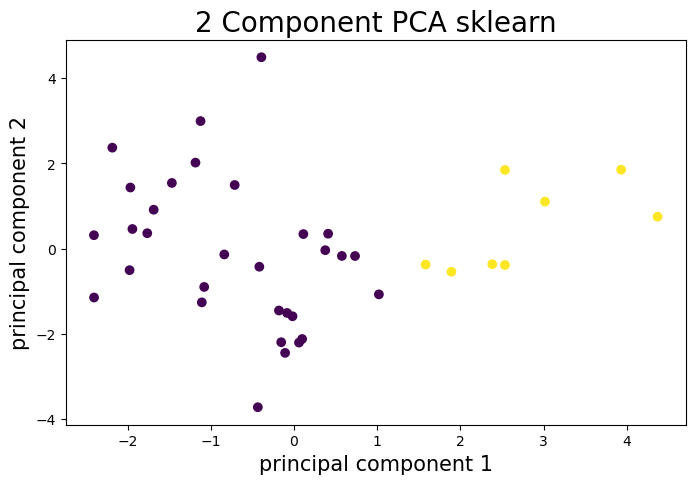

In [ ]:
# [12] 

pcs = np.column_stack((data_reduced[:,0], data_reduced[:,1]))

principalDf2 = pd.DataFrame(data = pcs, columns = ['principal component 1', 'principal component 2'])
finalDf2 = pd.concat([principalDf2,pd.DataFrame(data,columns = ['Land_use'])], axis = 1) 

fig = plt.figure(1, figsize=(8, 5))
ax = fig.add_subplot(1,1,1) 
ax.scatter(finalDf2['principal component 1'], 
           finalDf2['principal component 2'], 
           c = finalDf2['Land_use'])
ax.set_xlabel('principal component 1', fontsize = 15) 
ax.set_ylabel('principal component 2', fontsize = 15)
ax.set_title('2 Component PCA sklearn', fontsize = 20) 
plt.show()

If you have done everything correctly, both plots should look identically (or maybe with mirrored results, if you have switched the orientation of one of the axes). 

Other ways to inspect and visualise PCA results include the Loading Plot, i.e. a bar plot showing the contribution of each parameter to the principal components. 

- Create a Loading plot, for the first two PCs (e.g. using `subplots` in `matplotlib`) and the bars according to the parameters in your dataset. 

- Looking at this plot, you can now assess the importance of each parameter in the different PCs. How would you rate the importance of the land use? 

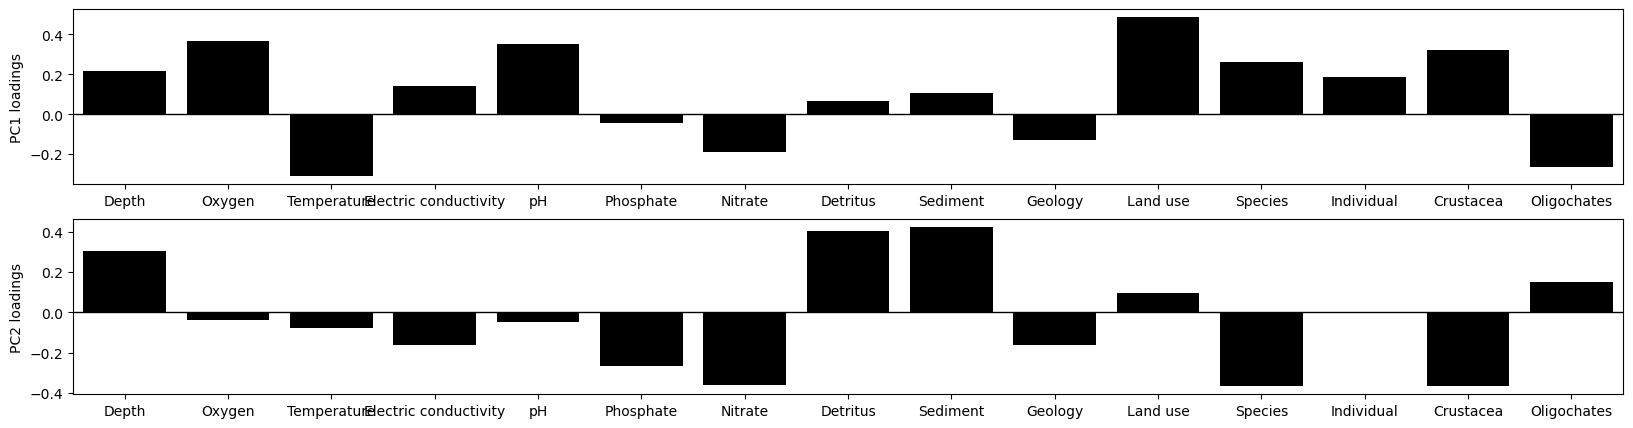

In [27]:
# [13] Loading Plot

fig = plt.figure(1, figsize=(20, 5))
ax1 = plt.subplot(211)

bars = ['Depth', 'Oxygen', 'Temperature', 'Electric conductivity', 'pH', 'Phosphate', 'Nitrate', 'Detritus', 'Sediment', 'Geology', 'Land use', 'Species', 'Individual', 'Crustacea', 'Oligochates']

ax1.bar(bars, model.components_[0], color='k')
ax1.hlines(0, -1, 15, colors='k', lw=1)
ax1.set_ylabel('PC1 loadings')
ax1.set_xlim(-0.5, 14.5)

ax2 = plt.subplot(212)
ax2.bar(bars, model.components_[1], color='k')
ax2.hlines(0, -1, 15, colors='k', lw=1)
ax2.set_ylabel('PC2 loadings')
ax2.set_xlim(-0.5, 14.5)


plt.show()


## END

### References: 

Koch et al. (2020), Groundwater fauna in an urban area: natural or affected? https://hess.copernicus.org/preprints/hess-2020-151/hess-2020-151.pdf

Lever et al. (2017) Principal component analysis, Nature Methods 14(7), 641-642, https://doi.org/10.1038/nmeth.4346 

https://towardsdatascience.com/a-complete-guide-to-principal-component-analysis-pca-in-machine-learning-664f34fc3e5a